In [2]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes

sns.set()

In [3]:
# import the necessary packages
import tensorflow as tf

In [4]:
# generate the data

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

inputs = np.vstack((negative_samples,
                    positive_samples)).astype(np.float32)

In [5]:
# generate the labels8  V
targets = np.vstack((
    np.zeros((num_samples_per_class, 1), dtype="float32"),
    np.ones((num_samples_per_class, 1), dtype="float32")
))

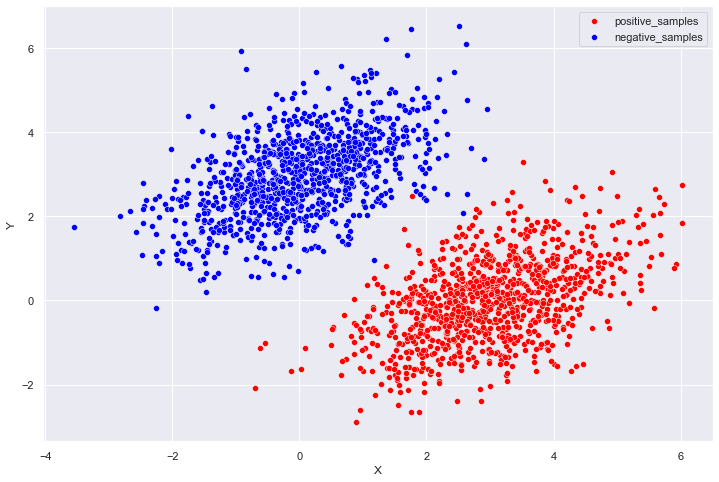

In [6]:
# lets plot the +ve and -ve points
sns.set(font_scale=1)
f, ax = plt.subplots(1, 1, figsize=(12, 8))  # type: Figure, Axes
sns.scatterplot(x=positive_samples[:, 0], y=positive_samples[:, 1], label="positive_samples", color="red", ax=ax)
sns.scatterplot(x=negative_samples[:, 0], y=negative_samples[:, 1], label="negative_samples", color="blue", ax=ax)
ax.set_xlabel("X")
ax.set_ylabel("Y");

In [7]:
input_dimm = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dimm, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [8]:
# define the model
def model(inputs):
    return tf.matmul(inputs, W) + b

In [9]:
# constuct the loss function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [10]:
# training step
lr = 0.1


def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        preds = model(inputs)
        loss = square_loss(preds, targets)
    grad_loss_wrt_w, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(lr * grad_loss_wrt_w)
    b.assign_sub(lr * grad_loss_wrt_b)
    return loss

In [11]:
# train the model
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"[INFO] loss at step: {step} : {loss:0.4f}......")

[INFO] loss at step: 0 : 1.9804......
[INFO] loss at step: 1 : 0.3159......
[INFO] loss at step: 2 : 0.1459......
[INFO] loss at step: 3 : 0.1180......
[INFO] loss at step: 4 : 0.1077......
[INFO] loss at step: 5 : 0.1001......
[INFO] loss at step: 6 : 0.0934......
[INFO] loss at step: 7 : 0.0874......
[INFO] loss at step: 8 : 0.0819......
[INFO] loss at step: 9 : 0.0768......
[INFO] loss at step: 10 : 0.0723......
[INFO] loss at step: 11 : 0.0681......
[INFO] loss at step: 12 : 0.0643......
[INFO] loss at step: 13 : 0.0609......
[INFO] loss at step: 14 : 0.0577......
[INFO] loss at step: 15 : 0.0549......
[INFO] loss at step: 16 : 0.0523......
[INFO] loss at step: 17 : 0.0499......
[INFO] loss at step: 18 : 0.0478......
[INFO] loss at step: 19 : 0.0458......
[INFO] loss at step: 20 : 0.0440......
[INFO] loss at step: 21 : 0.0424......
[INFO] loss at step: 22 : 0.0409......
[INFO] loss at step: 23 : 0.0395......
[INFO] loss at step: 24 : 0.0383......
[INFO] loss at step: 25 : 0.0372...

In [12]:
# plot the decision boundary
predictions = model(inputs).numpy()

In [13]:
predictions[np.where(predictions > 0.5)]
predictions.max()
predictions.min()

-0.5052638

In [14]:
# get the weights and biases so that we can plot the decision boundary
weights = W.numpy().ravel()
print(f"[INFO] weights : {weights}......")

bias = b.numpy()
print(f"[INFO] bias : {bias}......")

[INFO] weights : [ 0.17206587 -0.1281118 ]......
[INFO] bias : [0.41164827]......


The line is in the for of $W_2X_2 + W_1X_1 + b = 0$ or if rearranged can be expressed as $X_2 = (-W_1/W_2)X_1 -b/W_2$

In [15]:
# finding the grad and coeffs of the line
line_grad1 = -weights[0] / weights[1]
line_grad2 = -weights[0] / weights[1]
line_coeff1 = (-bias[0] + 0.0) / weights[1]
line_coeff2 = (-bias[0] + 0.5) / weights[1]
print(f"[INFO] line_grad: {line_grad2} and line_coeff: {line_coeff2}......")

[INFO] line_grad: 1.343091607093811 and line_coeff: -0.6896455304063293......


In [16]:
# now plot the line in the range of existing points
x1 = np.linspace(start=inputs[:, 0].min(),
                 stop=inputs[:, 1].max(),
                 num=1000)
x2_a = line_grad1 * x1 + line_coeff1
x2_b = line_grad2 * x1 + line_coeff2

Text(0, 0.5, 'Y')

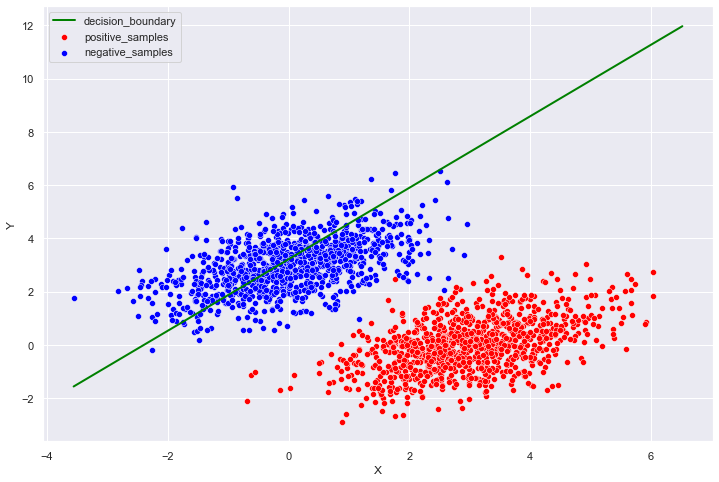

In [17]:
# lets plot the +ve and -ve points overlaid with model line
sns.set(font_scale=1)
f, ax = plt.subplots(1, 1, figsize=(12, 8))  # type: Figure, Axes
sns.scatterplot(x=positive_samples[:, 0], y=positive_samples[:, 1], label="positive_samples", color="red", ax=ax)
sns.scatterplot(x=negative_samples[:, 0], y=negative_samples[:, 1], label="negative_samples", color="blue", ax=ax)
sns.lineplot(x=x1, y=x2_a,label="decision_boundary",color="green", linewidth=2,ax=ax)
#sns.lineplot(x=x1, y=x2_b,label="decision_boundary_0.5",color="purple", linewidth=2,ax=ax)
ax.set_xlabel("X")
ax.set_ylabel("Y")